In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm

In [68]:
def energy_label(row):
    if row['ENERGY SOURCE']=='Natural Gas':
        return 'Conventional'
    elif row['ENERGY SOURCE']=='Petroleum':
        return 'Conventional'
    elif row['ENERGY SOURCE']=='Coal':
        return 'Conventional'
    elif  row['ENERGY SOURCE']=='Other Biomass':
        return 'Conventional'
    elif  row['ENERGY SOURCE']=='Hydroelectric Conventional':
        return 'Green Energy'
    elif row['ENERGY SOURCE']=='Wood and Wood Derived Fuels':
        return 'Conventional'
    elif row['ENERGY SOURCE']=='Other':
        return 'N/A'
    elif row['ENERGY SOURCE']=='Wind':
        return 'Green Energy'
    elif row['ENERGY SOURCE']=='Nuclear':
        return 'Green Energy'
    elif row['ENERGY SOURCE']=='Solar Thermal and Photovoltaic':
        return 'Green Energy'
    elif row['ENERGY SOURCE']=='Pumped Storage':
        return 'Green Energy'
    elif row['ENERGY SOURCE']=='Geothermal':
        return 'Green Energy'
    elif row['ENERGY SOURCE'] == 'Other Gases':
        return 'Conventional'
    else:
        return 'N/A'


In [69]:
"""
    This function will remove the unneccesary columns from the data as well as condense it to be most usefull
    the end result will be a total of 29*3 rows
    each row represents a single year and a single energy source, and shows its total output
    for example:

        1990, Clean Energy, 500000 MwH
        1990, Dirty Energy, 100000MwH
        1990, Unknown, 25000MwH
        1991, Clean Energy, 600000Mwh
        ....
        ...

"""
def Stage0Clean():
    data = pd.read_csv("Energy_data.csv", header='infer',converters={})



In [70]:
"""
    This function will remove the unneccesary columns from the data as well as condense it to be most usefull
    the end result will be a total of 29*3 rows
    each row represents a single year and a single energy source, and shows its total output
    for example:
    
        1990, Clean Energy, 500000 MwH
        1990, Dirty Energy, 100000MwH
        1990, Unknown, 25000MwH
        1991, Clean Energy, 600000Mwh
        ....
        ...

"""
def Stage1Clean():
    Keep_columns=['year_energy','generation_megawatthours','energy_type']
    data=pd.read_csv("Energy_data.csv",header='infer')
    keep=data[Keep_columns]
    as_csv=keep.to_csv(index=False).splitlines() #get data as a list of rows
    header=as_csv.pop(0)
    out_dict={}
    for row in as_csv:
        row=row.split(",")  #split each row by a comma value
        if row:
            year=int(row[0])
            mwh=int(row[1])
            style=row[2]
            if year in out_dict:
                if style in out_dict[year]:
                    out_dict[year][style]+=mwh
                elif style not in out_dict[year]:
                    out_dict[year][style] = mwh
            elif year not in out_dict:
                out_dict[year]={style:mwh}


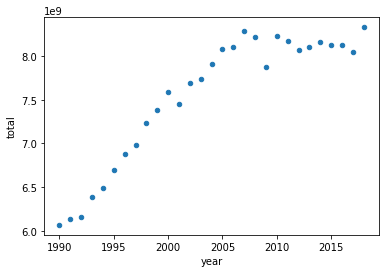

In [71]:
"""
    Now to plot:
    data=pd.read_csv("cleaned_data.csv")
    data.plot.scatter(x='year',y='total')
    data.plot.scatter(x='year',y='conventional')
    data.plot.scatter(x='year',y='green')
    data.plot.scatter(x=['year','year','year'],y=['total','conventional','green'])
    test_data=data.assign(Percentage=1.0*  data['green']/data['total'])
"""
from sklearn.datasets import make_regression

data=pd.read_csv("cleaned_data.csv")
data.plot.scatter(x='year',y='total')
# data.plot.scatter(x='year',y='conventional')
# data.plot.scatter(x='year',y='green')
# data.plot.scatter(x=['year','year','year'],y=['total','conventional','green'])
# test_data=data.assign(Percentage=1.0*  data['green']/data['total'])

In [72]:
#X, y = make_regression(n_samples=20, n_features=1, random_state=0, noise=4, bias=100.0)

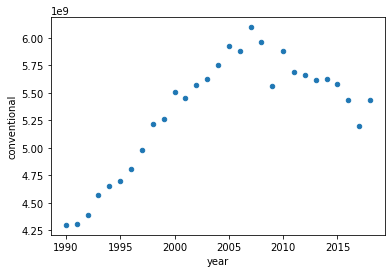

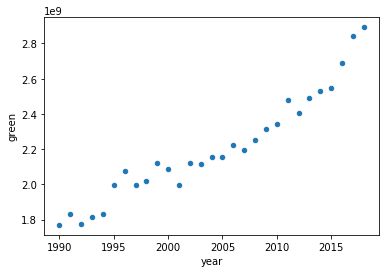

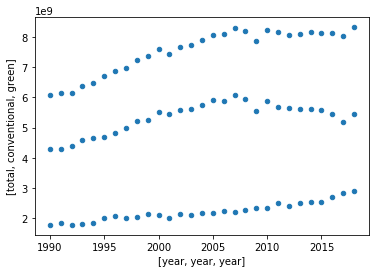

In [73]:
data.plot.scatter(x='year',y='conventional')
data.plot.scatter(x='year',y='green')
data.plot.scatter(x=['year','year','year'],y=['total','conventional','green'])
test_data=data.assign(Percentage=1.0*  data['green']/data['total'])

it ran!


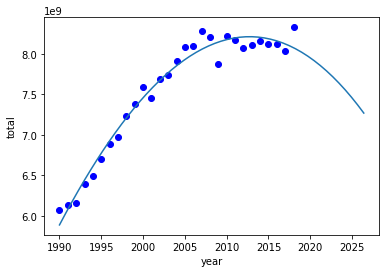

<Figure size 432x288 with 0 Axes>

In [111]:

"""
    ShowRegression(datafraem=[pandas.DataFrame], y=[list], x=[list, defaultis ['year']], polynomial_degree=[integer, default=3])

    This will take a dataframe object, assuming the object has columns "year,conventional,green,total"
    It will make a regression graph of degree polynomial_degre

    INPUT:
        a pandas dataframe object with columns "year,conventional,green,total"
        the y-axis(or axes) is equal to the value(s) of parameter y.
        [OPTIONAL] the x-axis(or axes) is equal to the value(s) of parameter x. Default is 'year'
        [OPTIONA] the degree of the polynomial to use for the regression line

    OUTPUT:
        return void.  Creates a matplotlib graph
"""



def ShowRegression(dataframe,x=['year'],y=['total'],polynomial_degree=3,future_prediction_timespan=.3):
    x_name="\n".join(x)
    y_name="\n+\n".join(y)
    color=colors[y[0]]
    if (len(y)>len(x)):
        x=[x[0] for i in range(len(y))]  #incase we pass in multiple ys, but no x, lets just duplicate x
    x=dataframe[x].to_numpy().flatten()
    y=dataframe[y].to_numpy().flatten()
    plt.figure(num="energy regression X={},y={} with ploynomial_degree={}".format(str(x),str(y),str(polynomial_degree)))
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    mymodel = np.poly1d(np.polyfit(x, y, polynomial_degree))
    how_far_in_the_future= future_prediction_timespan* (max(x)-min(x))
    myline = np.linspace(min(x), max(x)+how_far_in_the_future)  #this ensures that the regression line will alwyas be plotted using the same domain as x
    
    plot=plt.scatter(x, y,color=color)
    plt.plot(myline, mymodel(myline))
    plt.show()
    
print("it ran!")



colors={'year':"black",'conventional':"red","green":"green","total":"blue"}
data = pd.read_csv("cleaned_data.csv")

#print(allcols)
ShowRegression(data)  #show default of x=year and y=total using a 3rd degree polynomial
plt.savefig('total.png')




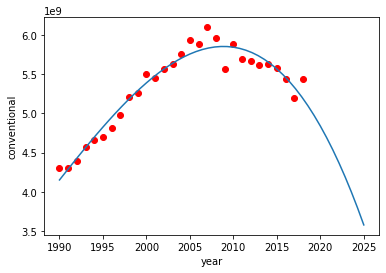

In [109]:
def ShowRegression(dataframe,x=['year'],y=['conventional'],polynomial_degree=3,future_prediction_timespan=.25):
    x_name="\n".join(x)
    y_name="\n+\n".join(y)
    color=colors[y[0]]
    if (len(y)>len(x)):
        x=[x[0] for i in range(len(y))]  #incase we pass in multiple ys, but no x, lets just duplicate x
    x=dataframe[x].to_numpy().flatten()
    y=dataframe[y].to_numpy().flatten()
    plt.figure(num="energy regression X={},y={} with ploynomial_degree={}".format(str(x),str(y),str(polynomial_degree)))
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    mymodel = np.poly1d(np.polyfit(x, y, polynomial_degree))
    how_far_in_the_future= future_prediction_timespan* (max(x)-min(x))
    myline = np.linspace(min(x), max(x)+how_far_in_the_future)  #this ensures that the regression line will alwyas be plotted using the same domain as x
    
    plot=plt.scatter(x, y,color=color)
    plt.plot(myline, mymodel(myline))
    plt.show()

#print("it ran!")



colors={'year':"black",'conventional':"red","green":"green","total":"blue"}
data = pd.read_csv("cleaned_data.csv")

#print(allcols)
ShowRegression(data)  #show default of x=year and y=total using a 3rd degree polynomial


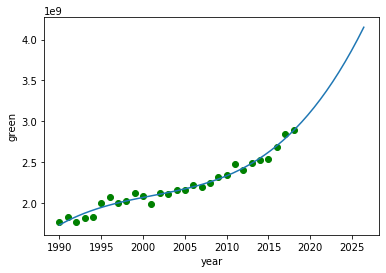

In [110]:
def ShowRegression(dataframe,x=['year'],y=['green'],polynomial_degree=3,future_prediction_timespan=.3):
    x_name="\n".join(x)
    y_name="\n+\n".join(y)
    color=colors[y[0]]
    if (len(y)>len(x)):
        x=[x[0] for i in range(len(y))]  #incase we pass in multiple ys, but no x, lets just duplicate x
    x=dataframe[x].to_numpy().flatten()
    y=dataframe[y].to_numpy().flatten()
    plt.figure(num="energy regression X={},y={} with ploynomial_degree={}".format(str(x),str(y),str(polynomial_degree)))
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    mymodel = np.poly1d(np.polyfit(x, y, polynomial_degree))
    how_far_in_the_future= future_prediction_timespan* (max(x)-min(x))
    myline = np.linspace(min(x), max(x)+how_far_in_the_future)  #this ensures that the regression line will alwyas be plotted using the same domain as x
    
    plot=plt.scatter(x, y,color=color)
    plt.plot(myline, mymodel(myline))
    plt.show()
    

#print("it ran!")



colors={'year':"black",'conventional':"red","green":"green","total":"blue"}
data = pd.read_csv("cleaned_data.csv")

#print(allcols)
ShowRegression(data)  #show default of x=year and y=total using a 3rd degree polynomial


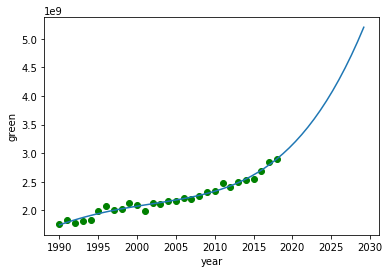

In [85]:
ShowRegression(data,polynomial_degree=4,future_prediction_timespan=.4) #use a string light with default instead of a polynomail

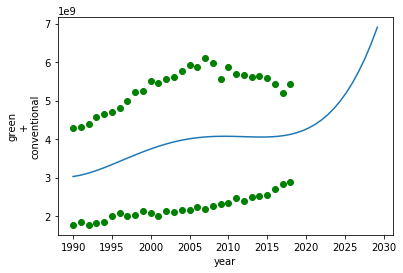

In [94]:

ShowRegression(data,y=['green','conventional'],polynomial_degree=4,future_prediction_timespan=.4) #plot a regression of green and conventional totals over time

#the graph will plot a regression represting a ration of conventional to green energy
#in other to

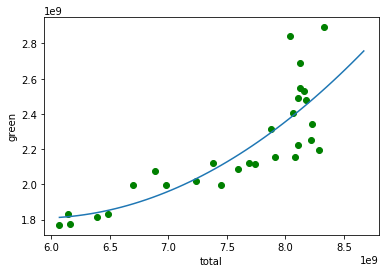

In [79]:
ShowRegression(data,x=['total'],y=['green'],polynomial_degree=2)#plot the relation between green energy and total eneryg